In [13]:
 #detect time series using moving average
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [14]:
#read data
data = pd.read_csv('../../data/m16_cpu_usage_v2_10minutes.csv', delimiter=',')
data['time'] = pd.to_datetime(data['time'])

In [15]:
data.tail()

,time,machine_id,cpu_util
3248,2017-10-25 13:20:00,m16,0.285000
3249,2017-10-25 13:30:00,m16,0.456667
3250,2017-10-25 13:40:00,m16,0.200000
3251,2017-10-25 13:50:00,m16,0.263333
3252,2017-10-25 14:00:00,m16,0.426667


In [16]:
#add new row
data.loc[len(data)] = ['2017-10-25 14:10:00', 'm16', 95.0]

In [17]:
data.tail()

,time,machine_id,cpu_util
3249,2017-10-25 13:30:00,m16,0.456667
3250,2017-10-25 13:40:00,m16,0.200000
3251,2017-10-25 13:50:00,m16,0.263333
3252,2017-10-25 14:00:00,m16,0.426667
3253,2017-10-25 14:10:00,m16,95.000000


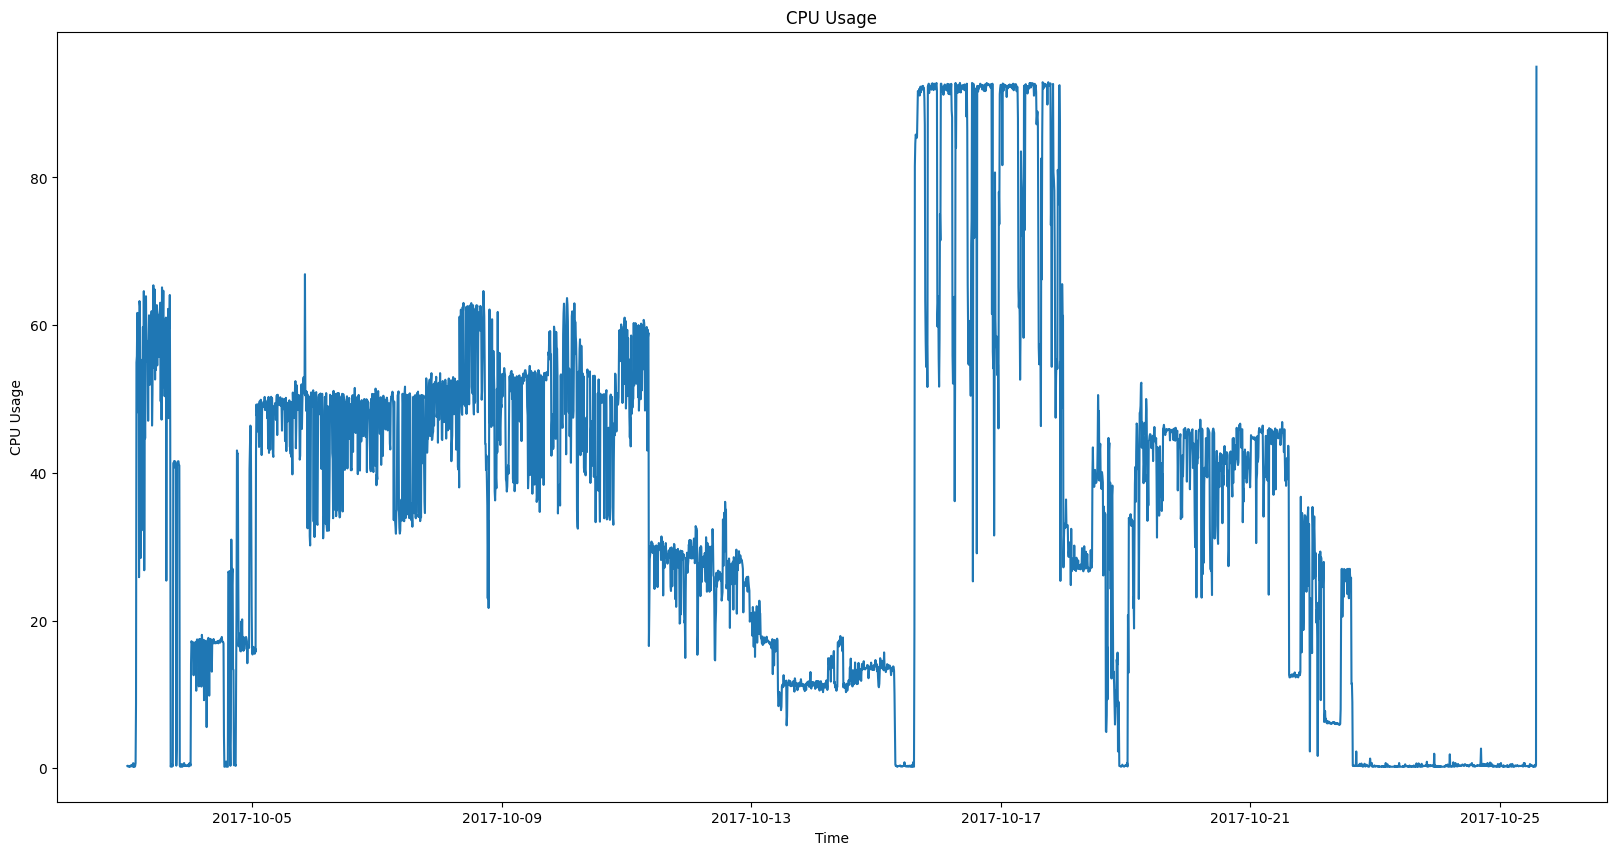

In [18]:
#plot data
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['cpu_util'])
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.show()


In [19]:
#moving average
def moving_average(data, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')

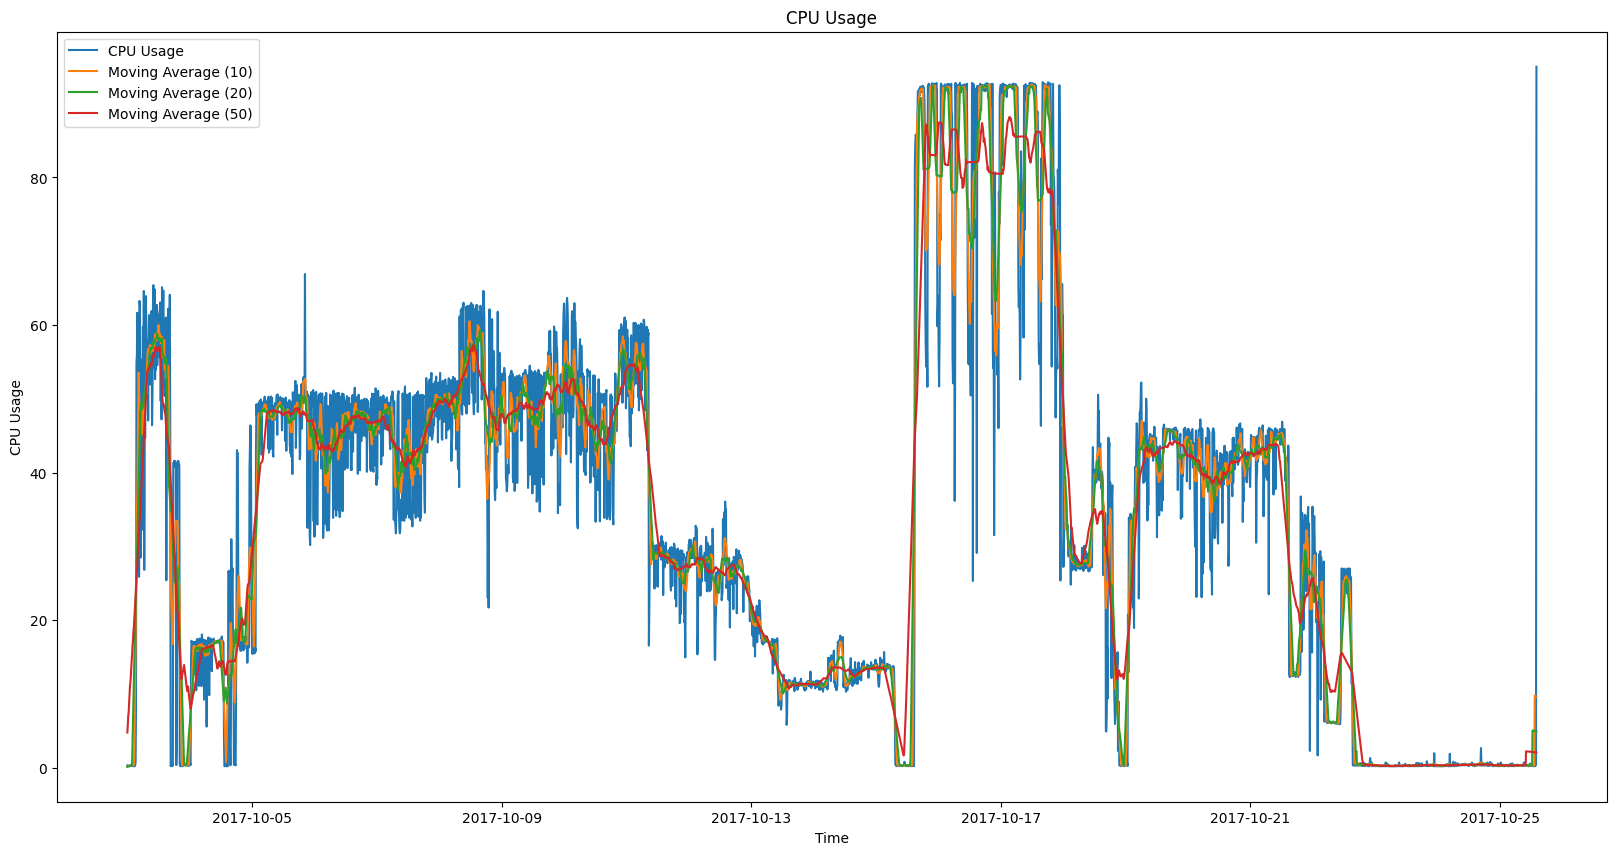

In [20]:
#plot moving average
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['cpu_util'], label='CPU Usage')
plt.plot(data['time'], moving_average(data['cpu_util'], 10), label='Moving Average (10)')
plt.plot(data['time'], moving_average(data['cpu_util'], 20), label='Moving Average (20)')
plt.plot(data['time'], moving_average(data['cpu_util'], 50), label='Moving Average (50)')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()


In [21]:
#identify deviation
def identify_deviation(data, window_size, sigma):
    avg = moving_average(data, window_size).tolist()
    residual = data - avg
    std = np.std(residual)
    return np.where(residual > std*sigma, 1, 0)

In [22]:
#detect anomaly
def detect_anomaly(data, window_size, sigma):
    deviation = identify_deviation(data, window_size, sigma)
    index = np.where(deviation == 1)
    return index[0].tolist()


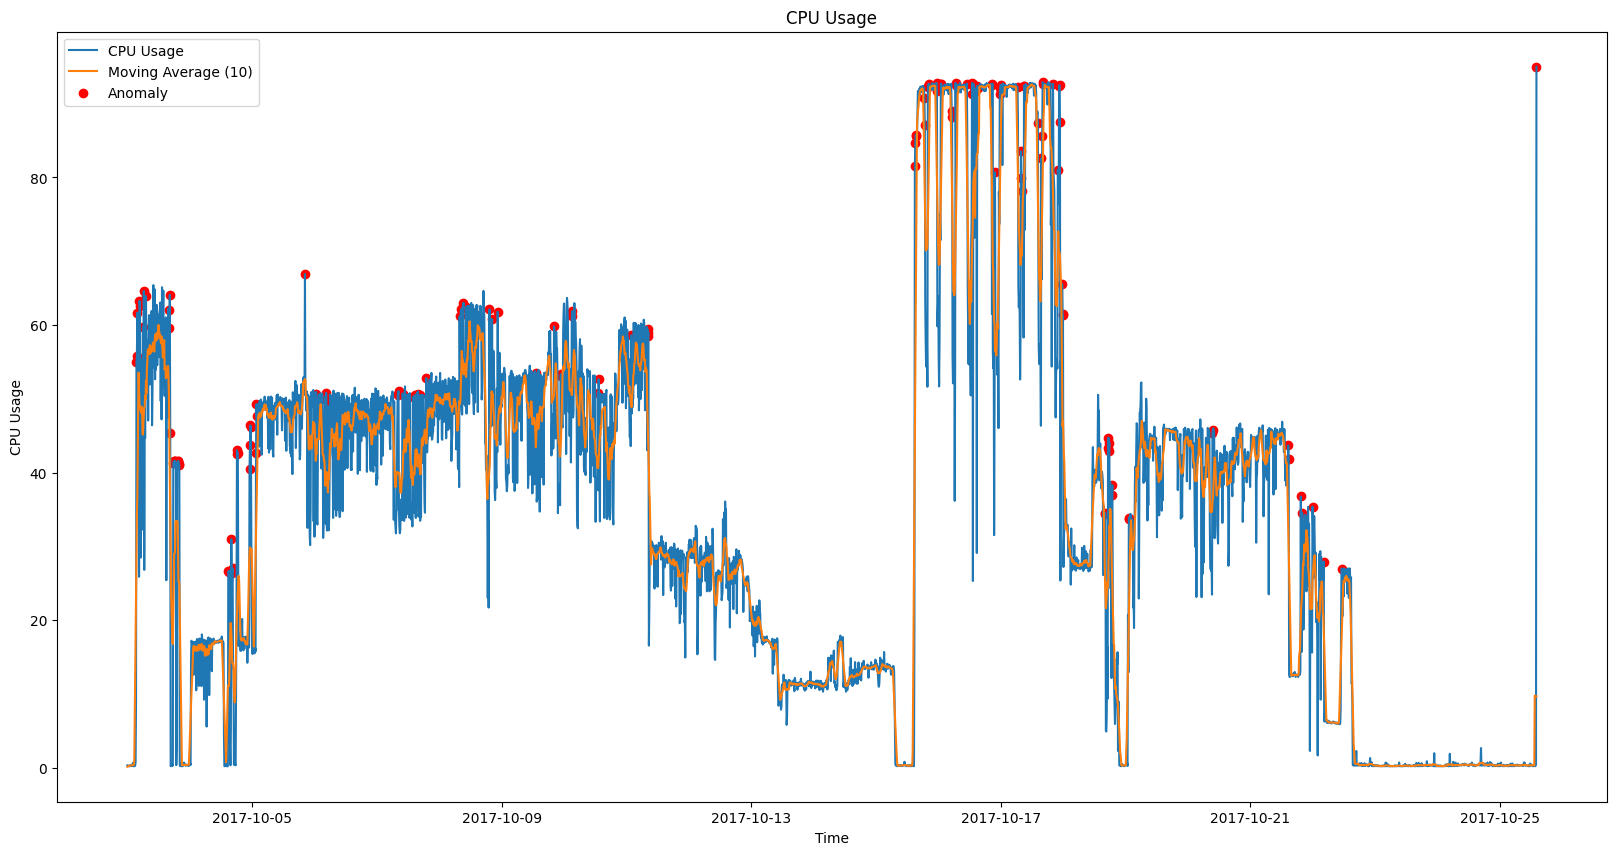

In [23]:
#plot anomaly with window size 10 and sigma 1.5
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['cpu_util'], label='CPU Usage')
plt.plot(data['time'], moving_average(data['cpu_util'], 10), label='Moving Average (10)')
plt.scatter(data['time'][detect_anomaly(data['cpu_util'], 10, 1.5)], data['cpu_util'][detect_anomaly(data['cpu_util'], 10, 1.5)], label='Anomaly', color='red')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()


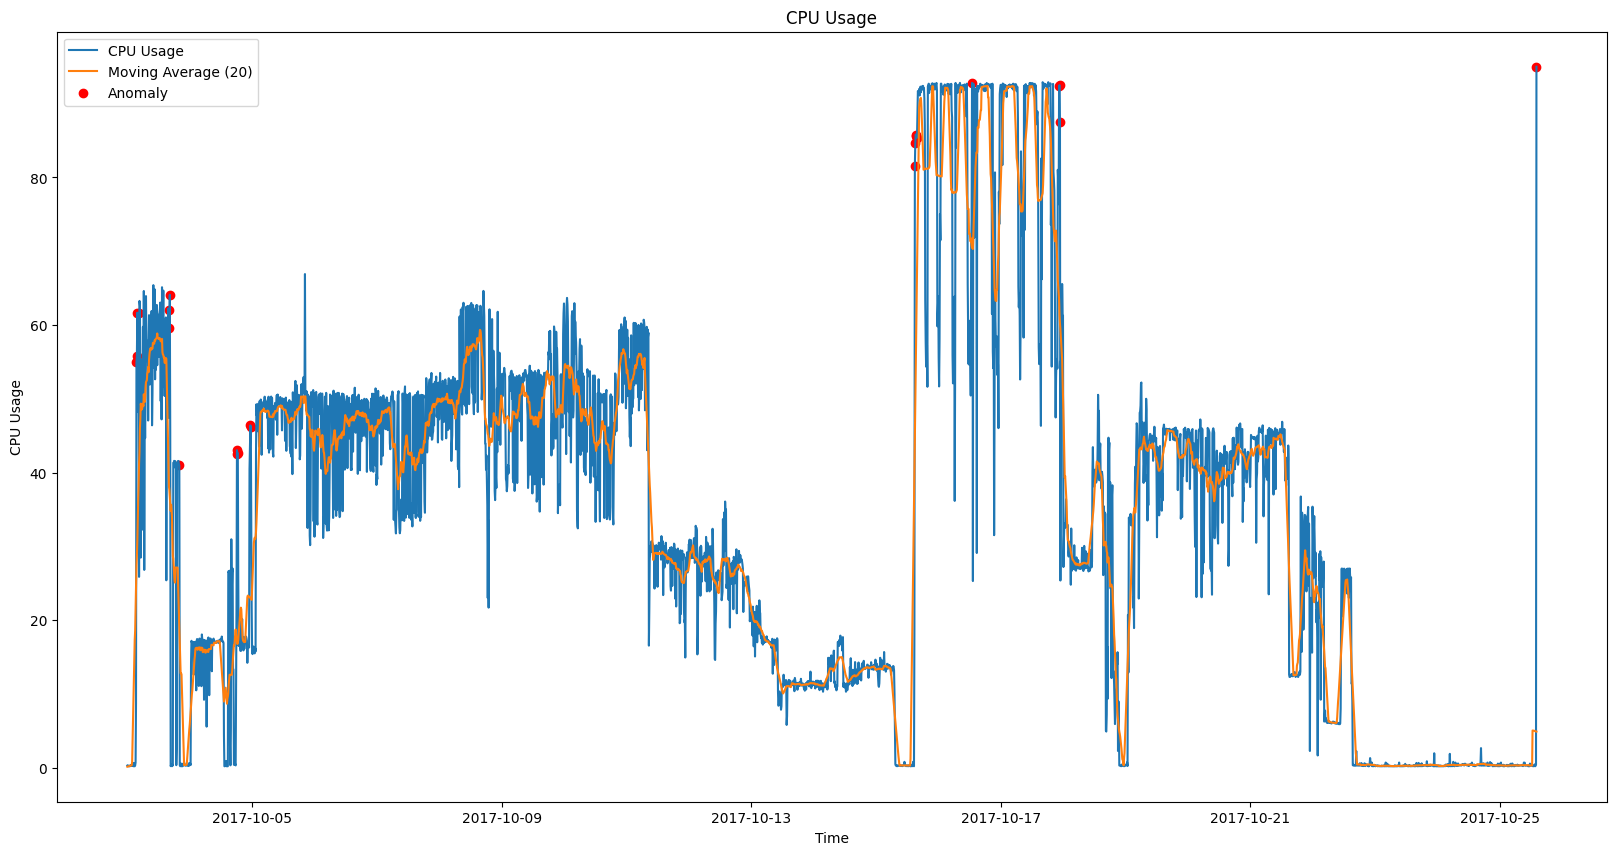

In [24]:
#plot anomaly with window size 20 and sigma 1.5
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['cpu_util'], label='CPU Usage')
plt.plot(data['time'], moving_average(data['cpu_util'], 20), label='Moving Average (20)')
plt.scatter(data['time'][detect_anomaly(data['cpu_util'], 20, 3)], data['cpu_util'][detect_anomaly(data['cpu_util'], 20, 3)], label='Anomaly', color='red')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()


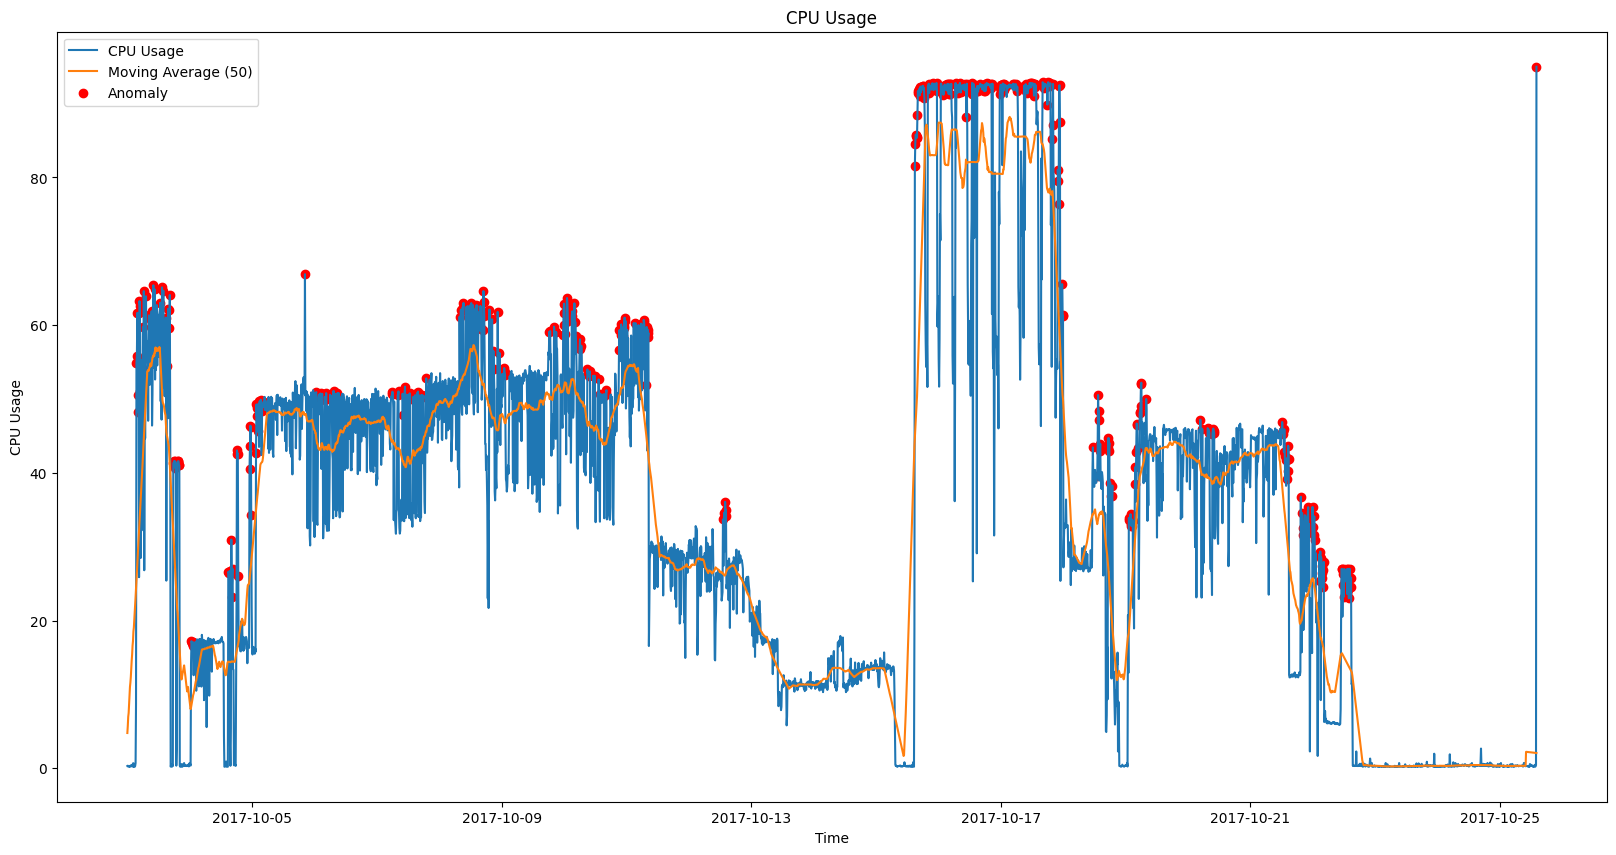

In [25]:
#plot anomaly with window size 50 and sigma 1.5
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['cpu_util'], label='CPU Usage')
plt.plot(data['time'], moving_average(data['cpu_util'], 50), label='Moving Average (50)')
plt.scatter(data['time'][detect_anomaly(data['cpu_util'], 50, 0.7)], data['cpu_util'][detect_anomaly(data['cpu_util'], 50, 0.7)], label='Anomaly', color='red')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()

In [26]:
#label anomaly
data['anomaly'] = identify_deviation(data['cpu_util'], 50, 0.7)
data.head()


,time,machine_id,cpu_util,anomaly
0,2017-10-03 00:00:00,m16,0.300000,0
1,2017-10-03 00:10:00,m16,0.340000,0
2,2017-10-03 00:20:00,m16,0.253333,0
3,2017-10-03 00:30:00,m16,0.200000,0
4,2017-10-03 00:40:00,m16,0.200000,0


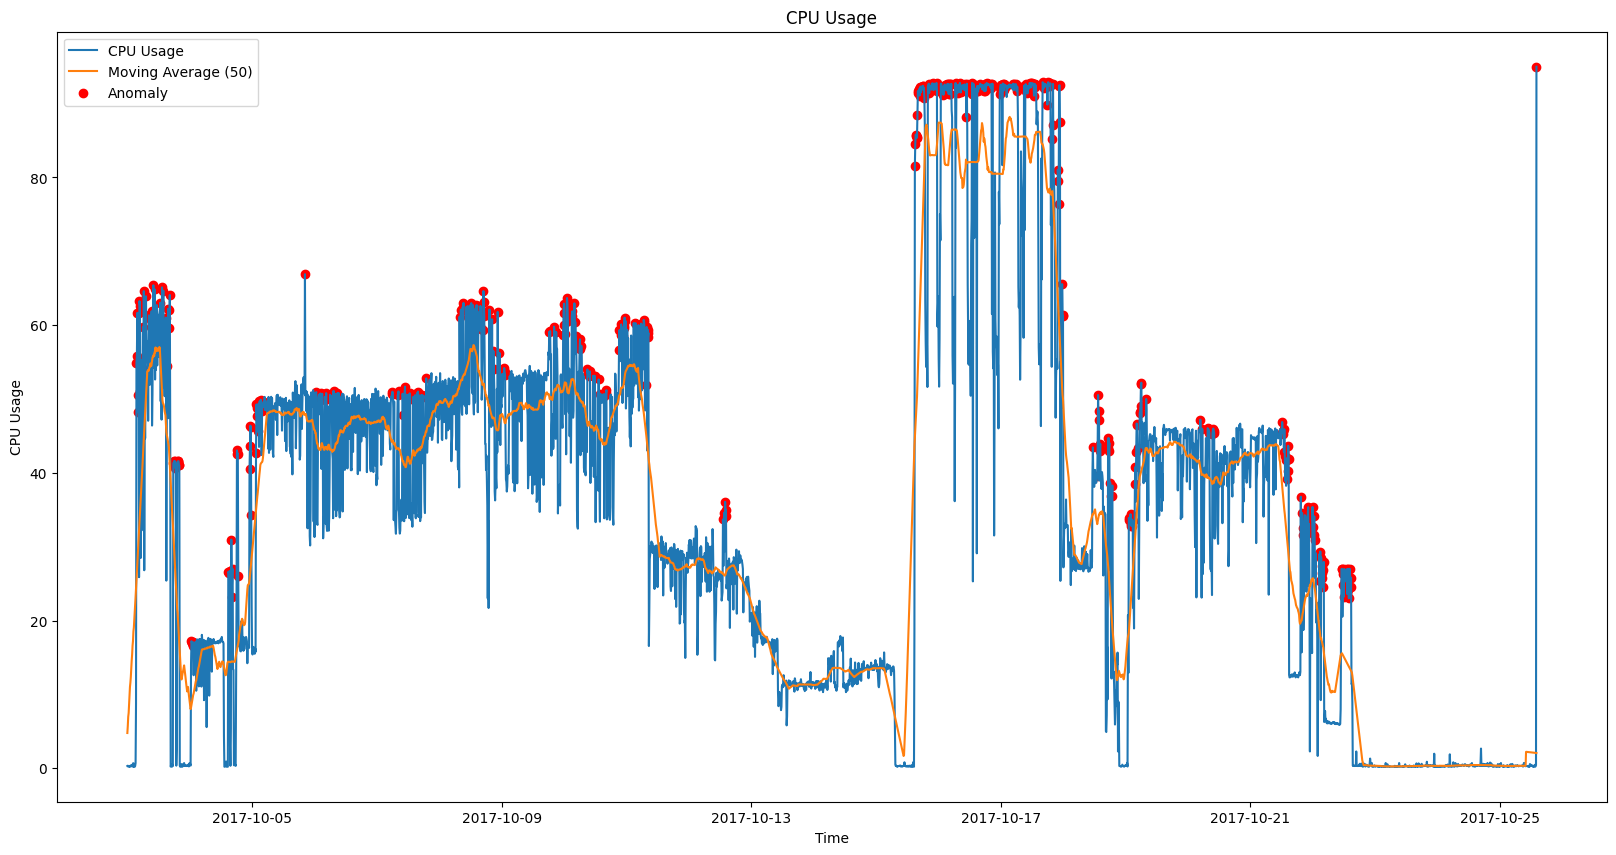

In [27]:
#plot anomaly
plt.figure(figsize=(20,10))
plt.plot(data['time'], data['cpu_util'], label='CPU Usage')
plt.plot(data['time'], moving_average(data['cpu_util'], 50), label='Moving Average (50)')
plt.scatter(data['time'][data['anomaly'] == 1], data['cpu_util'][data['anomaly'] == 1], label='Anomaly', color='red')
plt.title('CPU Usage')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.legend()
plt.show()


In [28]:
data.where(data['anomaly'] == 1).dropna()

,time,machine_id,cpu_util,anomaly
21,2017-10-03 03:30:00,m16,54.940000,1.0
22,2017-10-03 03:40:00,m16,55.800000,1.0
23,2017-10-03 03:50:00,m16,61.660000,1.0
24,2017-10-03 04:00:00,m16,50.533333,1.0
25,2017-10-03 04:10:00,m16,48.190000,1.0
...,...,...,...,...
2822,2017-10-22 14:20:00,m16,27.000000,1.0
2823,2017-10-22 14:30:00,m16,25.700000,1.0
2824,2017-10-22 14:40:00,m16,24.593333,1.0
2825,2017-10-22 14:50:00,m16,25.800000,1.0


In [54]:
data.to_csv('../../data/m16_cpu_usage_v2_10minutes_anomaly.csv', index=False)